In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline

Contagems joão Colin:
+ Contagem 1:
    + Motos: 1
    + Bicicleta: 2
    + Carros: 30
    + Caminhões: 0
+ Contagem 2:
    + Motos: 2
    + Bicicleta: 0
    + Carros: 8
    + Caminhões: 1
+ Contagem 3:
    + Motos: 0
    + Bicicleta: 1
    + Carros: 0
    + Caminhões: 0

In [2]:
filepath = '../contagens/joao-colin-01.txt'
# filepath = '../contagens/joao-colin-02.txt'
# filepath = '../contagens/joao-colin-03.txt'

content = []
with open(filepath) as fd:
    content = fd.readlines()

In [3]:
# 8191 is the constant value the sensor returns when there is no reading (Iddle status)
iddle_rx = re.compile('^8191\n$')
distance_rx = re.compile('^(\d+)\n$')
time_rx = re.compile('^Time: (\d+)\n$')

# Should add an idle placeholder between readings
add_idle_placeholder = True

# Control variable for idle status
idle = False
idle_offset = 5

distance = 0
time = 0
values = []

# Cleaning and Transforming file content into a tabular structure
for line in content:
    if iddle_rx.match(line):
        if add_idle_placeholder and not idle:
            idle = True
            values.append([0, time + idle_offset])
        continue
        
    match = distance_rx.match(line)
    if match:
        distance = int(match.group(1))
        continue
    
    match = time_rx.search(line)
    if match:
        time = int(match.group(1))
        
    if add_idle_placeholder and idle:
        values.append([0, time - idle_offset])
        idle = False
            
    if distance and time:
        values.append([distance, time])
        distance = 0
        
# Building a pandas Dataframe
columns = ['Distance', 'Time']
df = pd.DataFrame(values, columns=columns)

# Dataframe summary
df.describe()

,Distance,Time
count,497.000000,497.000000
mean,292.160966,106252.726358
std,400.339571,51533.148525
min,0.000000,5.000000
25%,0.000000,62961.000000
50%,0.000000,105382.000000
75%,640.000000,153221.000000
max,1253.000000,196595.000000


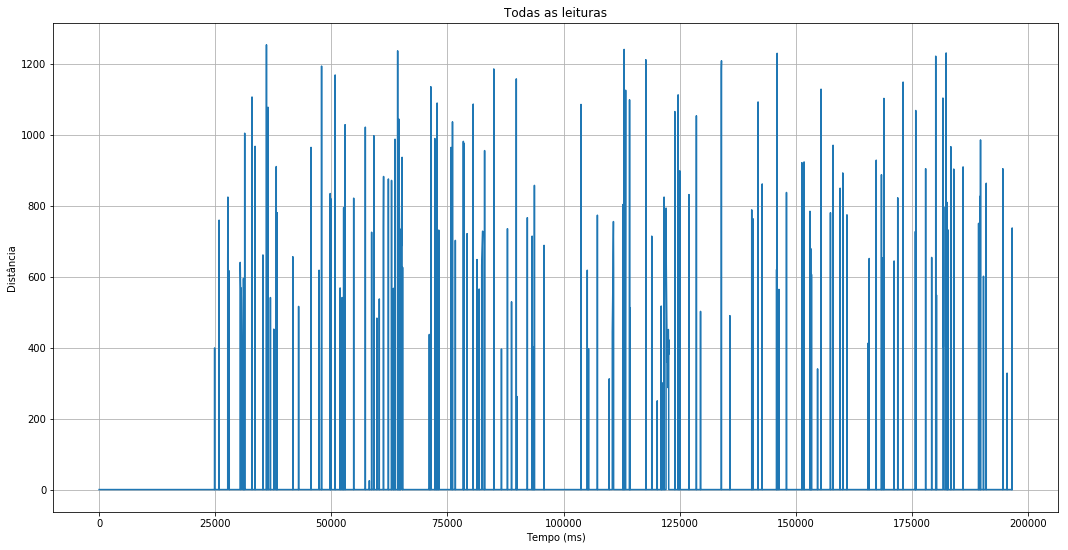

In [4]:
plt.rcParams['figure.figsize'] = (18,9)

# Plot entire dataset
plt.plot(df['Time'], df['Distance'])
plt.title('Todas as leituras')
plt.xlabel('Tempo (ms)')
plt.ylabel('Distância')
plt.grid(True)

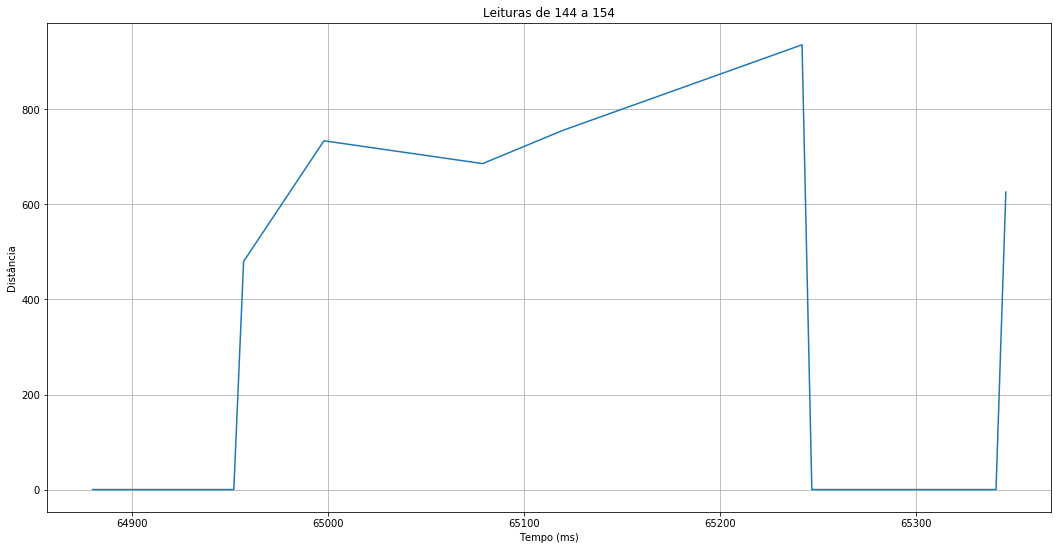

In [5]:
# Set window for pontual analysis
win_size = 10
win_start = 144
win_end = win_start + win_size

# Ploting window entries
wdf = df.iloc[win_start:win_end].copy()
plt.plot(wdf['Time'], wdf['Distance']);
plt.title('Leituras de %d a %d' % (win_start, win_end))
plt.xlabel('Tempo (ms)')
plt.ylabel('Distância')
plt.grid(True)